# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, RandomizedSearchCV,GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import accuracy_score, precision_score,make_scorer, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")




In [2]:
#loading the data
data = pd.read_csv('Customer_behavior')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_int,booking_continent
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,6,Oceania
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,6,Oceania
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,3,Asia
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,6,Oceania
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,3,Asia


In [3]:
#dropping columns which will not be used for model building
data = data.drop(['route','booking_origin','flight_day'],axis=1)
data


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_int,booking_continent
0,2,Internet,RoundTrip,262,19,7,1,0,0,5.52,0,6,Oceania
1,1,Internet,RoundTrip,112,20,3,0,0,0,5.52,0,6,Oceania
2,2,Internet,RoundTrip,243,22,17,1,1,0,5.52,0,3,Asia
3,1,Internet,RoundTrip,96,31,4,0,0,1,5.52,0,6,Oceania
4,2,Internet,RoundTrip,68,22,15,1,0,1,5.52,0,3,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,2,Internet,RoundTrip,27,6,9,1,0,1,5.62,0,6,Oceania
42277,1,Internet,RoundTrip,111,6,4,0,0,0,5.62,0,7,Oceania
42278,1,Internet,RoundTrip,24,6,22,0,0,1,5.62,0,6,Oceania
42279,1,Internet,RoundTrip,15,6,11,1,0,1,5.62,0,1,Oceania


In [4]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
flight_day_int           0
booking_continent        0
dtype: int64

In [5]:
data = data.drop_duplicates()

**Variable Encoding**

We will perform this by applying one hot encoding to variables with lower categories and label encoding to variables with high categories.

In [6]:
Categorical_columns = [cname for cname in data.columns if data[cname].dtype =='object']
Categorical_columns

['sales_channel', 'trip_type', 'booking_continent']

In [7]:
data = data.copy()

In [8]:
#label encoding
le_columns = ['trip_type', 'booking_continent','sales_channel']
for col in le_columns:
    le = LabelEncoder()
    le.fit_transform(data[col])
    data[col] = le.transform(data[col])
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_int,booking_continent
0,2,0,2,262,19,7,1,0,0,5.52,0,6,4
1,1,0,2,112,20,3,0,0,0,5.52,0,6,4
2,2,0,2,243,22,17,1,1,0,5.52,0,3,1
3,1,0,2,96,31,4,0,0,1,5.52,0,6,4
4,2,0,2,68,22,15,1,0,1,5.52,0,3,1


**Splitting Data into Training and Testing Sets**

In [9]:
X = data.drop('booking_complete',axis=1)
y = data['booking_complete']
print(X.shape)
print(y.shape)

(42253, 12)
(42253,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
y_train.value_counts()

booking_complete
0    28625
1     5177
Name: count, dtype: int64

## Handling class imbalance in the Target variable
We are going to achieve this through  undersampling the majority class and also oversampling the minority class.

*i) Random Undersampling*

In [12]:
# Randomly under sample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [13]:
y_train_rus.value_counts()

booking_complete
0    5177
1    5177
Name: count, dtype: int64

*ii) Random Oversampling*

In [14]:
from imblearn.over_sampling import RandomOverSampler

# Randomly over sample the minority class
ros = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [15]:
y_train_ros.value_counts()

booking_complete
0    28625
1    28625
Name: count, dtype: int64

### Standardization

In [16]:
#standardizing with  the imbalanced target class
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
#Standardizing the undersampled target class
scaler = StandardScaler()
scaler.fit_transform(X_train_rus)


array([[ 2.15996706,  2.88145541,  0.0796081 , ...,  1.1671468 ,
        -1.40435846,  1.63919317],
       [ 0.31244133, -0.34704684,  0.0796081 , ...,  1.05984011,
        -0.90279841, -0.6160497 ],
       [-0.61132153, -0.34704684,  0.0796081 , ...,  0.9994801 ,
        -1.40435846,  1.63919317],
       ...,
       [-0.61132153, -0.34704684,  0.0796081 , ...,  1.1671468 ,
        -0.40123835,  1.63919317],
       [-0.61132153, -0.34704684,  0.0796081 , ...,  1.1671468 ,
         0.60188175, -0.6160497 ],
       [ 0.31244133, -0.34704684,  0.0796081 , ...,  1.1671468 ,
        -0.40123835, -0.6160497 ]])

In [18]:
#Standardizing the oversampled target class
scaler = StandardScaler()
scaler.fit_transform(X_train_ros)

array([[-0.61590558,  2.94987211,  0.08722341, ..., -0.9889519 ,
         0.60304593,  1.62127687],
       [ 0.32015841,  2.94987211,  0.08722341, ..., -1.05594889,
         0.09943739, -0.62475706],
       [-0.61590558, -0.33899775,  0.08722341, ...,  1.16165153,
        -1.4113882 , -0.62475706],
       ...,
       [ 2.19228641,  2.94987211,  0.08722341, ..., -1.62542332,
        -0.90777967, -0.62475706],
       [ 0.32015841, -0.33899775,  0.08722341, ..., -0.31898198,
        -0.40417114, -0.62475706],
       [ 0.32015841, -0.33899775,  0.08722341, ...,  0.31748944,
         0.60304593, -0.62475706]])

# Model building and selection

We are going to build our model  without sampling and with both oversampling and undersampling the target variable.

**Model with imbalanced class**

In [19]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8467
- F1 score: 0.7766
- Precision: 0.0000
- Recall: 0.0000
- Roc Auc Score: 0.4999
----------------------------------
Model performance for Test set
- Accuracy: 0.5924
- F1 score: 0.6506
- Precision: 0.2121
- Recall: 0.6325
- Roc Auc Score: 0.6089


Decision Tree
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 1.0000
- Recall: 0.9986
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.5841
- F1 score: 0.6428
- Precision: 0.1685
- Recall: 0.4503
- Roc Auc Score: 0.5290


Random Forest
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9998
- Recall: 0.9985
- Roc Auc Score: 0.9992
----------------------------------
Model performance for Test set
- Accuracy: 0.8268
- F1 score: 0.7758
- Precision: 0.1316
- Recall: 0.0276
- Roc Auc Score: 0.4977


Gradient Boost
Model performance for Training se

**Model building with undersampling technique**




In [20]:
models = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_rus, y_train_rus)  # Train model with undersampled data

    # Make predictions
    y_train_pred = model.predict(X_train_rus)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_rus, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_rus, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_rus, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_rus, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_rus, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Logisitic Regression
Model performance for Training set
- Accuracy: 0.6570
- F1 score: 0.6524
- Precision: 0.6275
- Recall: 0.7730
- Roc Auc Score: 0.6570
----------------------------------
Model performance for Test set
- Accuracy: 0.5066
- F1 score: 0.5705
- Precision: 0.1939
- Recall: 0.7248
- Roc Auc Score: 0.5964


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.4338
- F1 score: 0.5046
- Precision: 0.1415
- Recall: 0.5473
- Roc Auc Score: 0.4805


Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.3484
- F1 score: 0.4068
- Precision: 0.1353
- Recall: 0.6199
- Roc Auc Score: 0.4602


Gradient Boost
Model performance for Training se

**Model building with oversampling technique**

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_ros, y_train_ros)  # Train model with oversampled data

    # Make predictions
    y_train_pred = model.predict(X_train_ros)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_ros, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_ros, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_ros, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_ros, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_ros, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.6603
- F1 score: 0.6558
- Precision: 0.6304
- Recall: 0.7750
- Roc Auc Score: 0.6603
----------------------------------
Model performance for Test set
- Accuracy: 0.5051
- F1 score: 0.5691
- Precision: 0.1934
- Recall: 0.7248
- Roc Auc Score: 0.5956


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8327
- F1 score: 0.7785
- Precision: 0.1524
- Recall: 0.0252
- Roc Auc Score: 0.5002


Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8475
- F1 score: 0.7802
- Precision: 0.0800
- Recall: 0.0016
- Roc Auc Score: 0.4992


Gradient Boost
Model performance for Training set

- From the analysis above it is clear that the oversampled class perfomed way better than the undersampled and normal classes.

- Both XGBoost and Random Forest show high accuracy on the training and test sets, but they suffer from low precision and recall on the test set. This indicates that these models are overfitting and not generalizing well to new data. We are going to increase the ability of the model to generalize to unseen data by using cross validation technique.

Cross validation

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier()
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    # Perform cross-validation and print results
    print(f"{model_name} - Cross-validation on Oversampled Data:")
    for score_name, score_func in scoring.items():
        cv_scores = cross_val_score(model, X_train_ros, y_train_ros, cv=skf, scoring=score_func)
        print(f"{score_name.capitalize()} (CV): {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print('='*35)

    # Train model with oversampled data
    model.fit(X_train_ros, y_train_ros)

    # Make predictions
    y_train_pred = model.predict(X_train_ros)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_ros, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_ros, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_ros, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_ros, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_ros, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')



Logistic Regression - Cross-validation on Oversampled Data:
Accuracy (CV): 0.6593 (+/- 0.0030)
F1 (CV): 0.6548 (+/- 0.0032)
Precision (CV): 0.6297 (+/- 0.0029)
Recall (CV): 0.7737 (+/- 0.0035)
Roc_auc (CV): 0.7165 (+/- 0.0025)
Logistic Regression
Model performance for Training set
- Accuracy: 0.6598
- F1 score: 0.6553
- Precision: 0.6301
- Recall: 0.7740
- Roc Auc Score: 0.6598
----------------------------------
Model performance for Test set
- Accuracy: 0.5042
- F1 score: 0.5682
- Precision: 0.1931
- Recall: 0.7248
- Roc Auc Score: 0.5950


Decision Tree - Cross-validation on Oversampled Data:
Accuracy (CV): 0.9164 (+/- 0.0019)
F1 (CV): 0.9161 (+/- 0.0025)
Precision (CV): 0.8586 (+/- 0.0040)
Recall (CV): 0.9987 (+/- 0.0026)
Roc_auc (CV): 0.9158 (+/- 0.0025)
Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.825

**Model Tuning**

In [23]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [24]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("Xgboost", XGBClassifier(), xgboost_params)

                   ]

In [25]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  {'learni

In [26]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_ros, y_train_ros)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [27]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features='auto', max_depth=None),
    "Xgboost": XGBClassifier(n_estimators=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.8)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_ros, y_train_ros)  # Train model with oversampled data

    # Make predictions
    y_train_pred = model.predict(X_train_ros)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_ros, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_ros, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_ros, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_ros, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_ros, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8483
- F1 score: 0.7802
- Precision: 0.0000
- Recall: 0.0000
- Roc Auc Score: 0.4990


Xgboost
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.6621
- F1 score: 0.7002
- Precision: 0.1724
- Recall: 0.3297
- Roc Auc Score: 0.5252




The Random Forest model perfomed quite well compared to XG boost on the the test accuracy.Though the model has a low precision and recall this might be improved through regularization

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8337
- F1 score: 0.7772
- Precision: 0.1215
- Recall: 0.0174
- Roc Auc Score: 0.4976




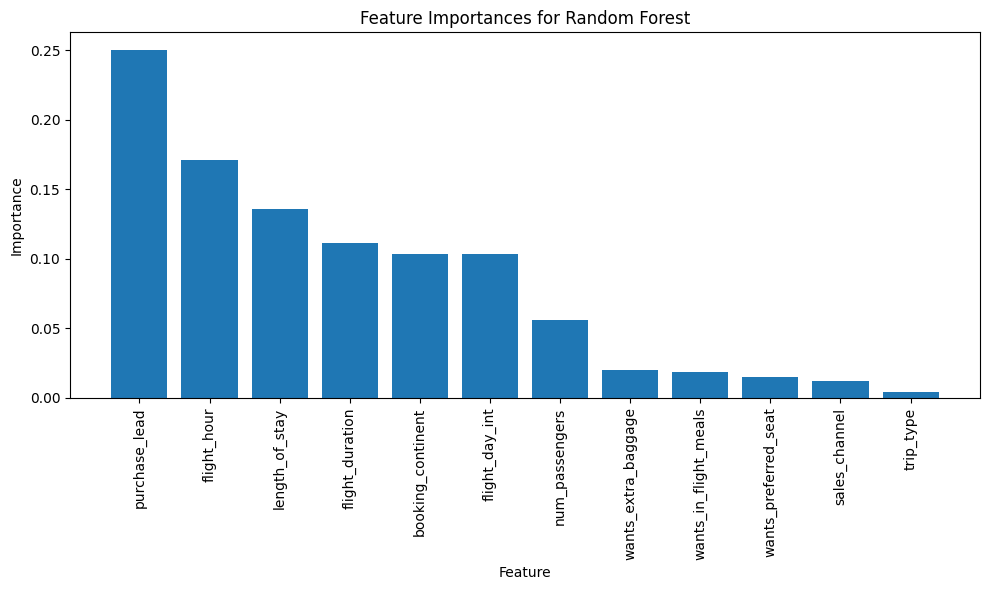

Xgboost
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.6621
- F1 score: 0.7002
- Precision: 0.1724
- Recall: 0.3297
- Roc Auc Score: 0.5252




In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features='auto', max_depth=None),
    "Xgboost": XGBClassifier(n_estimators=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.8)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_ros, y_train_ros)  # Train model with oversampled data

    # Make predictions
    y_train_pred = model.predict(X_train_ros)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_ros, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_ros, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_ros, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_ros, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_ros, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

    # Plot feature importance only for Random Forest
    if list(models.keys())[i] == "Random Forest":
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]
        features = X_train_ros.columns if hasattr(X_train_ros, 'columns') else range(len(feature_importances))
        sorted_features = [features[i] for i in sorted_idx]

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
        plt.xticks(range(len(feature_importances)), sorted_features, rotation=90)
        plt.title(f"Feature Importances for {list(models.keys())[i]}")
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()



This analysis delved into the factors influencing the model's predictions for booking outcomes, which is crucial for airlines. Importantly, 'purchase_lead', the time difference between a booking's purchase and the departure date, emerged as the most significant variable. This finding suggests that bookings made closer to the departure date might have a stronger influence on the model's predictions compared to other factors we considered. Based on these findings, airlines can prioritise strategies to influence bookings made closer to departure. This could involve targeted marketing campaigns or dynamic pricing adjustments.

While purchase lead proved to be the most critical factor, other flight related features also played a significant role in the model. Flight hour, capturing the departure time, flight duration, representing the total travel time, and length of stay, indicating the trip duration, were all identified as important features. Interestingly, the customer's booking origin, sales channel, and trip type were not found to be as important as other factors. This finding suggests that factors like travel window ('purchase-lead') might be more influential than initial assumptions about traveler demographics or trip purposes.

However, more features such as transparency, promotions, price comparison tools to name a few should be incorporated into the model for future investigation. Additionally, while the focus of this analysis was on booking outcomes, further investigation into cancellation predictions could be valuable. It is important to acknowledge that this analysis was based on a specific dataset and might not be generalisable to all airlines or market conditions. Future research with a broader dataset and external validation can strengthen these findings. By identifying the key factors influencing booking outcomes, this analysis provides valuable insights for airlines to improve their model performance and ultimately optimize their booking strategies.